**Vamos experimentar agora o algoritmo Decision Tree?**

In [41]:
!pip -q install yellowbrick


[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [42]:
import pandas as pd
import numpy as np
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import pickle
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from skopt import BayesSearchCV, space
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score


In [43]:
# with open(r'C:\Users\João\Documents\source\4o-periodo\inteligencia-artificial\Lista 2\output\titanic.pkl', 'rb') as f:
#     X_treino, X_teste, y_treino, y_teste = pickle.load(f)

In [44]:
X_treino = pd.read_csv(r'C:\Users\João\Documents\source\4o-periodo\inteligencia-artificial\Codigo Listas\X_train.csv')
y_treino = pd.read_csv(r'C:\Users\João\Documents\source\4o-periodo\inteligencia-artificial\Codigo Listas\y_train.csv')
X_teste = pd.read_csv(r'C:\Users\João\Documents\source\4o-periodo\inteligencia-artificial\Codigo Listas\X_test.csv')
y_teste = pd.read_csv(r'C:\Users\João\Documents\source\4o-periodo\inteligencia-artificial\Codigo Listas\y_test.csv')

In [45]:
y_treino = y_treino.values.ravel()
y_teste = y_teste.values.ravel()

In [46]:
print("Dimensões dos dados:")
print(f"X_treino: {X_treino.shape}")
print(f"X_teste: {X_teste.shape}")
print(f"y_treino: {y_treino.shape}")
print(f"y_teste: {y_teste.shape}")


Dimensões dos dados:
X_treino: (891, 9)
X_teste: (179, 9)
y_treino: (891,)
y_teste: (179,)


**Importando a biblioteca de ajuste de hiperparâmetros**

In [47]:
# from sklearn.model_selection import GridSearchCV

In [48]:
# Criando o modelo de árvore de decisão
# modelo = DecisionTreeClassifier(
#     criterion='entropy',  # Pode ser 'gini' ou 'entropy'
#     max_depth=3,          # Profundidade máxima da árvore
#     min_samples_split=15, # Número mínimo de amostras para dividir um nó
#     min_samples_leaf=2,   # Número mínimo de amostras em uma folha
#     random_state=42       # Para reprodutibilidade
# )

# param_grid = {
#     'criterion':  ['gini', 'entropy'],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [2, 4, 6],
#     'max_depth':  [None, 3, 5, 7, 10],
#     'max_features': [None, 'sqrt', 'log2', 0.2, 0.4, 0.6, 0.8],
# }

from this import d


dt_params = {
    'criterion': space.Categorical(['gini', 'entropy']),
    'max_depth': space.Integer(1, 20),
    'min_samples_split': space.Integer(2, 20),
    'min_samples_leaf': space.Integer(1, 20),
    'max_features': space.Categorical([None, 'sqrt', 'log2', 0.2, 0.4, 0.6, 0.8])
}

dt_model = DecisionTreeClassifier(random_state=42)
dt_search = BayesSearchCV(
    dt_model, 
    dt_params,
    n_iter=50,
    cv=5,
    scoring='f1',
    verbose=1,
    random_state=42
)

dt_search.fit(X_treino, y_treino)



Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fi

BayesSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
              random_state=42, scoring='f1',
              search_spaces={'criterion': Categorical(categories=('gini', 'entropy'), prior=None),
                             'max_depth': Integer(low=1, high=20, prior='uniform', transform='normalize'),
                             'max_features': Categorical(categories=(None, 'sqrt', 'log2', 0.2, 0.4, 0.6, 0.8), prior=None),
                             'min_samples_leaf': Integer(low=1, high=20, prior='uniform', transform='normalize'),
                             'min_samples_split': Integer(low=2, high=20, prior='uniform', transform='normalize')},
              verbose=1)

In [49]:
print("Melhores parâmetros para Árvore de Decisão:", dt_search.best_params_)
print("Melhor pontuação para Árvore de Decisão:", dt_search.best_score_)


Melhores parâmetros para Árvore de Decisão: OrderedDict([('criterion', 'gini'), ('max_depth', 7), ('max_features', 'log2'), ('min_samples_leaf', 11), ('min_samples_split', 20)])
Melhor pontuação para Árvore de Decisão: 0.769476629692147


In [50]:
dt_best = DecisionTreeClassifier(**dt_search.best_params_, random_state=42)
dt_best.fit(X_treino, y_treino)
dt_pred = dt_best.predict(X_teste)
dt_accuracy = accuracy_score(y_teste, dt_pred)
dt_f1 = f1_score(y_teste, dt_pred)

print("\nDesempenho da Árvore de Decisão:")
print(f"Acurácia: {dt_accuracy:.4f}")
print(f"F1-Score: {dt_f1:.4f}")
print(classification_report(y_teste, dt_pred))


Desempenho da Árvore de Decisão:
Acurácia: 0.8380
F1-Score: 0.7820
              precision    recall  f1-score   support

           0       0.81      0.94      0.87       104
           1       0.90      0.69      0.78        75

    accuracy                           0.84       179
   macro avg       0.85      0.82      0.83       179
weighted avg       0.85      0.84      0.83       179



In [51]:
# Fazendo previsões
y_pred_treino = dt_best.predict(X_treino)
y_pred_teste = dt_best.predict(X_teste)

In [52]:
# Matriz de confusão
print("\nMatriz de confusão (conjunto de teste):")
conf_matrix = confusion_matrix(y_teste, y_pred_teste)
print(conf_matrix)


Matriz de confusão (conjunto de teste):
[[98  6]
 [23 52]]


c:\Users\João\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


0.8379888268156425

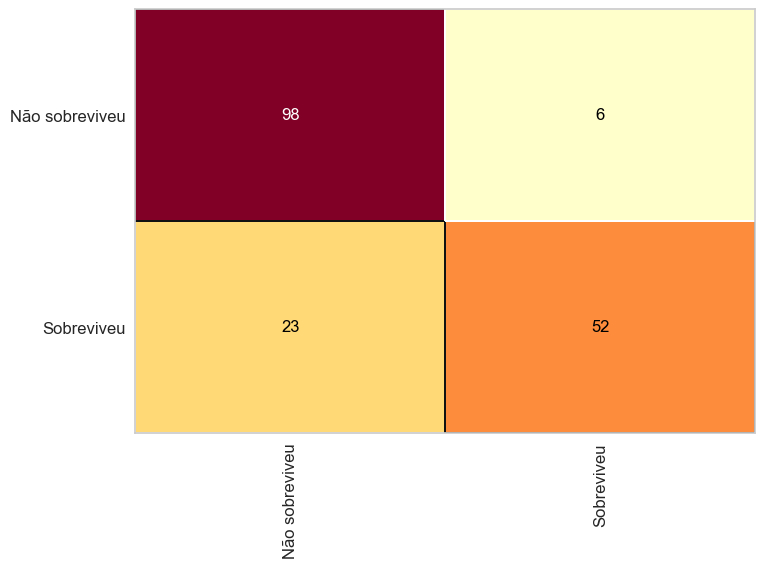

In [54]:
from yellowbrick.classifier import ConfusionMatrix

# Definir os rótulos das classes
classes = ['Não sobreviveu', 'Sobreviveu']

# Criar o visualizador com os rótulos personalizados
cm = ConfusionMatrix(
    dt_best, 
    classes=classes
)

# Ajustar o modelo e desenhar a matriz
cm.fit(X_treino, y_treino)
cm.score(X_teste, y_teste)


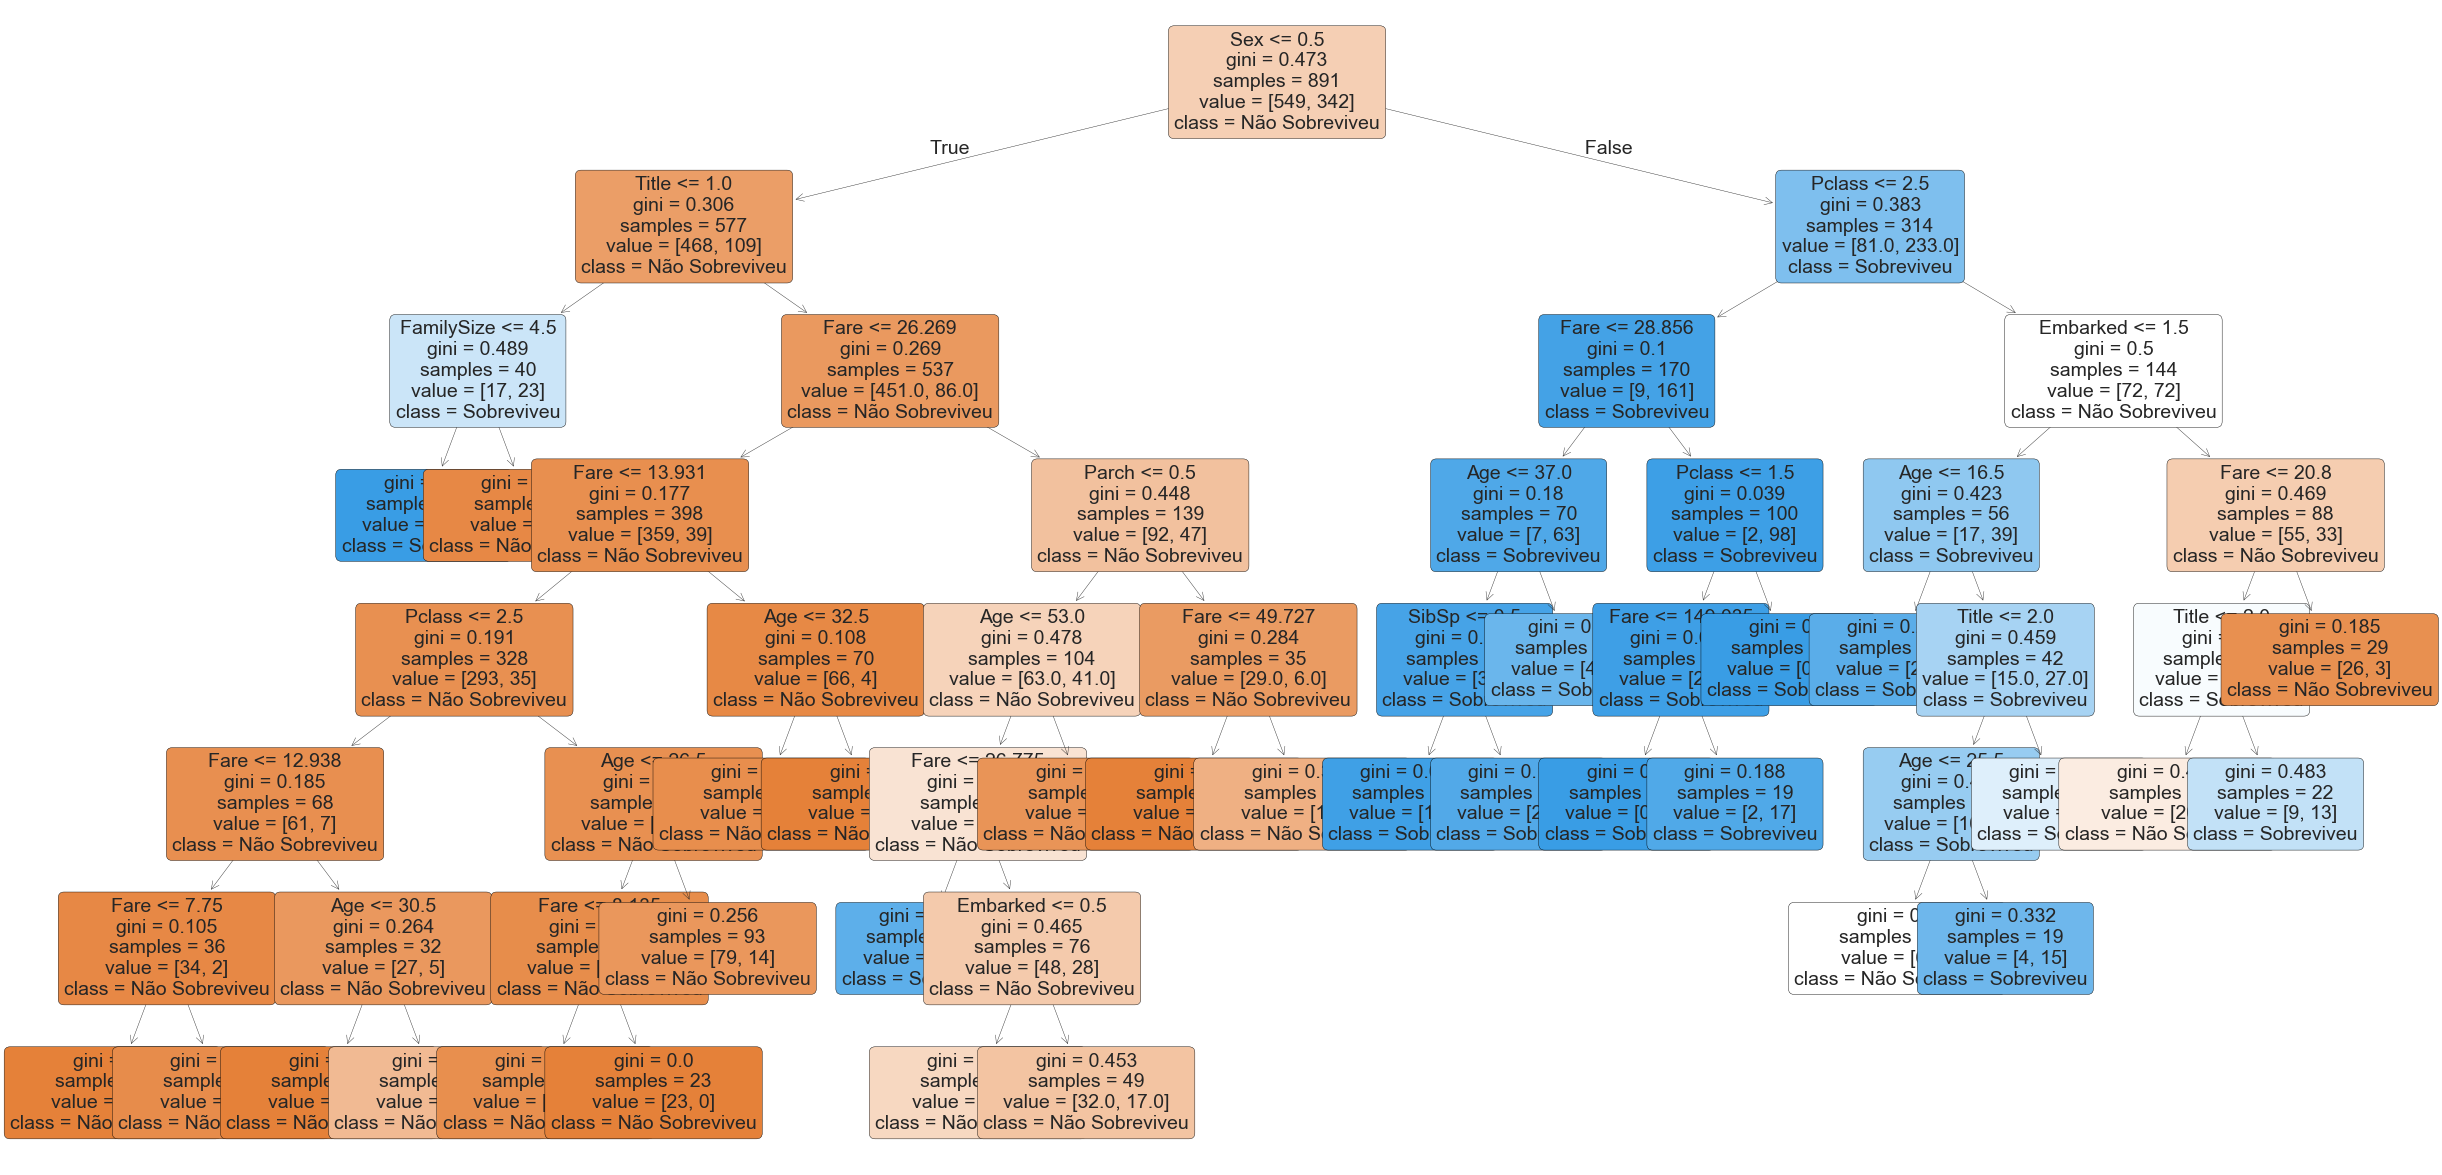

In [56]:
import matplotlib.pyplot as plt
from sklearn import tree
import graphviz 

# Método 1: Visualização básica com matplotlib (mais legível)
plt.figure(figsize=(30, 15))  
tree.plot_tree(
    dt_best, 
    feature_names=X_treino.columns,
    class_names= ['Não Sobreviveu', 'Sobreviveu'],
    filled=True, 
    rounded=True,
    fontsize=14  # Aumentei o tamanho da fonte
)
plt.savefig(r'C:\Users\João\Documents\source\4o-periodo\inteligencia-artificial\Codigo Listas\output\arvore_decisao_titanic.png', 
            dpi=300, 
            bbox_inches='tight',
            pad_inches=0.5)
plt.show()

In [57]:
# Para uma visualização mais compacta (opcional)
from sklearn.tree import export_text
texto_arvore = export_text(dt_best, feature_names=list(X_treino.columns))
print("\nRepresentação textual da árvore:")
print(texto_arvore)



Representação textual da árvore:
|--- Sex <= 0.50
|   |--- Title <= 1.00
|   |   |--- FamilySize <= 4.50
|   |   |   |--- class: 1
|   |   |--- FamilySize >  4.50
|   |   |   |--- class: 0
|   |--- Title >  1.00
|   |   |--- Fare <= 26.27
|   |   |   |--- Fare <= 13.93
|   |   |   |   |--- Pclass <= 2.50
|   |   |   |   |   |--- Fare <= 12.94
|   |   |   |   |   |   |--- Fare <= 7.75
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- Fare >  7.75
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- Fare >  12.94
|   |   |   |   |   |   |--- Age <= 30.50
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- Age >  30.50
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |--- Pclass >  2.50
|   |   |   |   |   |--- Age <= 26.50
|   |   |   |   |   |   |--- Fare <= 8.14
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- Fare >  8.14
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- Age >  26.50

In [59]:
dt_feature_importance = pd.DataFrame({
    'Feature': X_treino.columns,
    'Importance': dt_best.feature_importances_
}).sort_values('Importance', ascending=False)

print("\nImportância dos atributos na Árvore de Decisão:")
print(dt_feature_importance)
# Salvando o modelo treinado
with open(r'C:\Users\João\Documents\source\4o-periodo\inteligencia-artificial\Codigo Listas\output\modelo_arvore_titanic.pkl', 'wb') as f:
    pickle.dump(dt_best, f)

print("\nModelo salvo com sucesso!")


Importância dos atributos na Árvore de Decisão:
      Feature  Importance
1         Sex    0.539060
0      Pclass    0.135068
5        Fare    0.114868
7  FamilySize    0.076514
8       Title    0.058804
2         Age    0.032598
6    Embarked    0.031188
4       Parch    0.011264
3       SibSp    0.000637

Modelo salvo com sucesso!


In [60]:
rf_params = {
    'n_estimators': space.Integer(10, 300),
    'criterion': space.Categorical(['gini', 'entropy']),
    'max_depth': space.Integer(1, 20),
    'min_samples_split': space.Integer(2, 20),
    'min_samples_leaf': space.Integer(1, 20),
    'max_features': space.Categorical(['sqrt', 'log2', 0.2, 0.4, 0.6, 0.8])
}

rf_model = RandomForestClassifier(random_state=42)
rf_search = BayesSearchCV(
    rf_model,
    rf_params,
    n_iter=50,
    cv=5,
    scoring='f1',
    verbose=1,
    random_state=42
)

rf_search.fit(X_treino, y_treino)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fi

BayesSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
              random_state=42, scoring='f1',
              search_spaces={'criterion': Categorical(categories=('gini', 'entropy'), prior=None),
                             'max_depth': Integer(low=1, high=20, prior='uniform', transform='normalize'),
                             'max_features': Categorical(categories=('sqrt', 'log2', 0.2, 0.4, 0.6, 0.8), prior=None),
                             'min_samples_leaf': Integer(low=1, high=20, prior='uniform', transform='normalize'),
                             'min_samples_split': Integer(low=2, high=20, prior='uniform', transform='normalize'),
                             'n_estimators': Integer(low=10, high=300, prior='uniform', transform='normalize')},
              verbose=1)

In [61]:
print("\nMelhores parâmetros para Random Forest:", rf_search.best_params_)
print("Melhor pontuação para Random Forest:", rf_search.best_score_)


Melhores parâmetros para Random Forest: OrderedDict([('criterion', 'gini'), ('max_depth', 20), ('max_features', 'sqrt'), ('min_samples_leaf', 1), ('min_samples_split', 20), ('n_estimators', 300)])
Melhor pontuação para Random Forest: 0.7807583102602331


In [62]:
rf_best = RandomForestClassifier(**rf_search.best_params_, random_state=42)
rf_best.fit(X_treino, y_treino)
rf_pred = rf_best.predict(X_teste)
rf_accuracy = accuracy_score(y_teste, rf_pred)
rf_f1 = f1_score(y_teste, rf_pred)


In [63]:
print("\nDesempenho do Random Forest:")
print(f"Acurácia: {rf_accuracy:.4f}")
print(f"F1-Score: {rf_f1:.4f}")
print(classification_report(y_teste, rf_pred))



Desempenho do Random Forest:
Acurácia: 0.8492
F1-Score: 0.8085
              precision    recall  f1-score   support

           0       0.84      0.91      0.88       104
           1       0.86      0.76      0.81        75

    accuracy                           0.85       179
   macro avg       0.85      0.84      0.84       179
weighted avg       0.85      0.85      0.85       179



In [64]:
rf_feature_importance = pd.DataFrame({
    'Feature': X_treino.columns,
    'Importance': rf_best.feature_importances_
}).sort_values('Importance', ascending=False)

print("\nImportância dos atributos no Random Forest:")
print(rf_feature_importance)


Importância dos atributos no Random Forest:
      Feature  Importance
1         Sex    0.331171
5        Fare    0.164037
8       Title    0.151659
2         Age    0.114953
0      Pclass    0.109491
7  FamilySize    0.058721
3       SibSp    0.032072
6    Embarked    0.021902
4       Parch    0.015993


In [75]:
# Comparação dos modelos
print("\nComparação dos modelos:")
if rf_f1 > dt_f1:
    print("O Random Forest teve melhor desempenho em termos de f1-score.")
elif dt_f1 > rf_f1:
    print("A Árvore de Decisão teve melhor desempenho em termos de f1-score.")
else:
    print("Ambos os modelos tiveram o mesmo desempenho em termos de f1-score.")



Comparação dos modelos:
O Random Forest teve melhor desempenho em termos de f1-score.


In [76]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_treino, y_treino)

rf_best.fit(X_train_smote, y_train_smote)
rf_pred = rf_best.predict(X_teste)
rf_accuracy = accuracy_score(y_teste, rf_pred)
rf_f1_smote = f1_score(y_teste, rf_pred)

print("\nDesempenho do Random Forest - SMOTE:")
print(f"Acurácia: {rf_accuracy:.4f}")
print(f"F1-Score: {rf_f1:.4f}")
print(classification_report(y_teste, rf_pred))


Desempenho do Random Forest - SMOTE:
Acurácia: 0.8659
F1-Score: 0.8105
              precision    recall  f1-score   support

           0       0.86      0.91      0.89       104
           1       0.87      0.80      0.83        75

    accuracy                           0.87       179
   macro avg       0.87      0.86      0.86       179
weighted avg       0.87      0.87      0.87       179



In [77]:
from imblearn.under_sampling import TomekLinks
tl = TomekLinks()
X_train_tl, y_train_tl = tl.fit_resample(X_treino, y_treino)

rf_best.fit(X_train_tl, y_train_tl)
rf_pred = rf_best.predict(X_teste)
rf_accuracy = accuracy_score(y_teste, rf_pred)
rf_f1_tl = f1_score(y_teste, rf_pred)

print("\nDesempenho do Random Forest - TomekLinks:")
print(f"Acurácia: {rf_accuracy:.4f}")
print(f"F1-Score: {rf_f1:.4f}")
print(classification_report(y_teste, rf_pred))


Desempenho do Random Forest - TomekLinks:
Acurácia: 0.8380
F1-Score: 0.8105
              precision    recall  f1-score   support

           0       0.86      0.87      0.86       104
           1       0.81      0.80      0.81        75

    accuracy                           0.84       179
   macro avg       0.83      0.83      0.83       179
weighted avg       0.84      0.84      0.84       179



In [78]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state=42)
X_train_rus, y_train_rus = rus.fit_resample(X_treino, y_treino)

rf_best.fit(X_train_rus, y_train_rus)
rf_pred = rf_best.predict(X_teste)
rf_accuracy = accuracy_score(y_teste, rf_pred)
rf_f1_rus = f1_score(y_teste, rf_pred)

print("\nDesempenho do Random Forest - RandomUnderSampler:")
print(f"Acurácia: {rf_accuracy:.4f}")
print(f"F1-Score: {rf_f1:.4f}")
print(classification_report(y_teste, rf_pred))


Desempenho do Random Forest - RandomUnderSampler:
Acurácia: 0.8380
F1-Score: 0.8105
              precision    recall  f1-score   support

           0       0.87      0.85      0.86       104
           1       0.79      0.83      0.81        75

    accuracy                           0.84       179
   macro avg       0.83      0.84      0.83       179
weighted avg       0.84      0.84      0.84       179



In [80]:
print("\nComparação dos balanceamentos:")
balanceamentos = {
    rf_f1_smote: "SMOTE",
    rf_f1_tl: "TomekLinks",
    rf_f1_rus: "RandomUnderSampler"
}
melhor_balanceamento = max(rf_f1_smote, rf_f1_tl, rf_f1_rus)


print(f"O melhor balanceamento foi: {balanceamentos[melhor_balanceamento]}")


Comparação dos balanceamentos:
O melhor balanceamento foi: SMOTE


In [88]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

numeric_features = X_treino.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = X_treino.select_dtypes(include=['object', 'category']).columns.tolist()

# 1. Imputação com média/moda
numeric_transformer_mean = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor_mean = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer_mean, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

X_train_mean = preprocessor_mean.fit_transform(X_treino)
X_test_mean = preprocessor_mean.transform(X_teste)
rf_best.fit(X_train_mean, y_treino)

rf_pred = rf_best.predict(X_test_mean)
rf_accuracy = accuracy_score(y_teste, rf_pred)
rf_f1_rus = f1_score(y_teste, rf_pred)

print("\nDesempenho do Random Forest - Mean:")
print(f"Acurácia: {rf_accuracy:.4f}")
print(f"F1-Score: {rf_f1:.4f}")
print(classification_report(y_teste, rf_pred))




Desempenho do Random Forest - Mean:
Acurácia: 0.8492
F1-Score: 0.8105
              precision    recall  f1-score   support

           0       0.84      0.91      0.88       104
           1       0.86      0.76      0.81        75

    accuracy                           0.85       179
   macro avg       0.85      0.84      0.84       179
weighted avg       0.85      0.85      0.85       179



In [90]:
# 2. Imputação com mediana/moda
numeric_transformer_median = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

preprocessor_median = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer_median, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

preprocessor_median = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer_median, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Aplicar transformação
X_train_median = preprocessor_median.fit_transform(X_treino)
X_test_median = preprocessor_median.transform(X_teste)

rf_best.fit(X_train_median, y_treino)

rf_pred = rf_best.predict(X_test_median)
rf_accuracy = accuracy_score(y_teste, rf_pred)
rf_f1_rus = f1_score(y_teste, rf_pred)

print("\nDesempenho do Random Forest - Median:")
print(f"Acurácia: {rf_accuracy:.4f}")
print(f"F1-Score: {rf_f1:.4f}")
print(classification_report(y_teste, rf_pred))




Desempenho do Random Forest - Median:
Acurácia: 0.8492
F1-Score: 0.8105
              precision    recall  f1-score   support

           0       0.84      0.91      0.88       104
           1       0.86      0.76      0.81        75

    accuracy                           0.85       179
   macro avg       0.85      0.84      0.84       179
weighted avg       0.85      0.85      0.85       179



In [95]:
from sklearn.impute import KNNImputer

# Passo 1: Identificar colunas numéricas e categóricas
colunas_numericas = X_treino.select_dtypes(include=['int64', 'float64']).columns.tolist()
colunas_categoricas = X_treino.select_dtypes(include=['object', 'category']).columns.tolist()

# Passo 2: Criar um pipeline para pré-processamento
# Para colunas categóricas, usamos OneHotEncoder
# Para colunas numéricas, usamos StandardScaler
preprocessador = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), colunas_categoricas),
        ('num', StandardScaler(), colunas_numericas)
    ])

# Passo 3: Aplicar o pré-processamento aos dados de treino e teste
X_treino_preprocessado = preprocessador.fit_transform(X_treino)
X_teste_preprocessado = preprocessador.transform(X_teste)

# Passo 4: Aplicar KNNImputer nos dados pré-processados
imputer_knn = KNNImputer(n_neighbors=5)
X_treino_knn = imputer_knn.fit_transform(X_treino_preprocessado)
X_teste_knn = imputer_knn.transform(X_teste_preprocessado)

rf_best.fit(X_treino_knn, y_treino)

rf_pred = rf_best.predict(X_teste_knn)
rf_accuracy = accuracy_score(y_teste, rf_pred)
rf_f1_rus = f1_score(y_teste, rf_pred)

print("\nDesempenho do Random Forest - KNN:")
print(f"Acurácia: {rf_accuracy:.4f}")
print(f"F1-Score: {rf_f1:.4f}")
print(classification_report(y_teste, rf_pred))


Desempenho do Random Forest - KNN:
Acurácia: 0.8492
F1-Score: 0.8105
              precision    recall  f1-score   support

           0       0.84      0.91      0.88       104
           1       0.86      0.76      0.81        75

    accuracy                           0.85       179
   macro avg       0.85      0.84      0.84       179
weighted avg       0.85      0.85      0.85       179



In [98]:
import pandas as pd
import numpy as np
from missingpy import MissForest
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline


# Passo 1: Identificar colunas numéricas e categóricas
colunas_numericas = X_treino.select_dtypes(include=['int64', 'float64']).columns.tolist()
colunas_categoricas = X_treino.select_dtypes(include=['object', 'category']).columns.tolist()

# Passo 2: Converter variáveis categóricas para numéricas usando OneHotEncoder
# MissForest funciona apenas com dados numéricos
preprocessador = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), colunas_categoricas)
    ],
    remainder='passthrough')  # mantém as colunas numéricas intactas


imputer_mf = MissForest(n_neighbors=5)
# Passo 3: Aplicar o pré-processamento
X_treino_mf = imputer_mf.fit_transform(X_treino)
X_teste_mf = imputer_mf.transform(X_teste)

rf_best.fit(X_treino_mf, y_treino)

rf_pred = rf_best.predict(X_teste_mf)
rf_accuracy = accuracy_score(y_teste, rf_pred)
rf_f1_rus = f1_score(y_teste, rf_pred)

print("\nDesempenho do Random Forest - MF:")
print(f"Acurácia: {rf_accuracy:.4f}")
print(f"F1-Score: {rf_f1:.4f}")
print(classification_report(y_teste, rf_pred))


ModuleNotFoundError: No module named 'sklearn.neighbors.base'